In [1]:
import numpy as np
import matplotlib.pyplot as plt
from gan import gan as GAN
import seaborn as sns

# Estimate Mean

  0%|          | 0/500 [00:00<?, ?it/s]

100%|██████████| 500/500 [00:05<00:00, 84.88it/s]


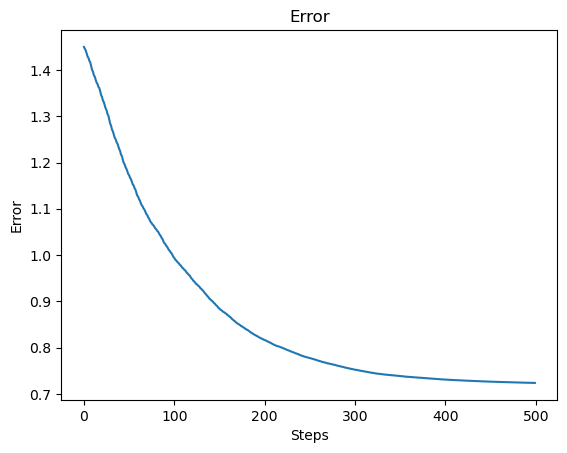

In [4]:
from gan_torch.mu import Mu

data_dim = 100

gan = Mu(data_dim, 0.1, 'cpu')
true_mean = np.zeros(data_dim)
out_mean = np.ones(data_dim) * 5
gan.dist_init(true_mean, out_mean)
gan.data_init(1000, 125)
gan.model_init(D_model='quadratic')
gan.optimizer_init(0.55, 0.95, 5, 1, weight_decay_d=1e-4, weight_decay_g=4e-3,
                scheduler='exp', gamma=0.99, momentum=0.75)
gan.fit(500)
gan.plot_error()

# Estimate Covariance Matrix

100%|██████████| 1000/1000 [01:02<00:00, 15.88it/s]


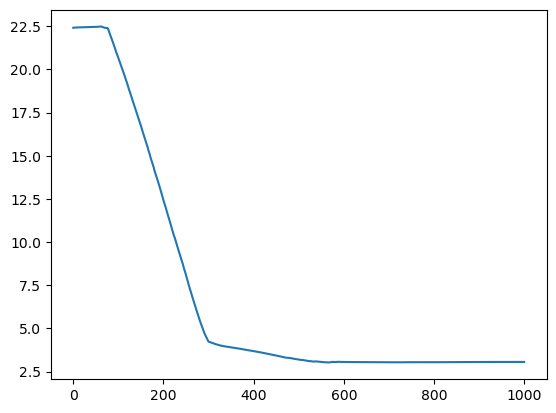

In [6]:
data_dim = 25
gan = GAN(data_dim, 0.2)
gan.dist_init('sigma', 0, 6, sigma_setting='ar')
gan.data_init(1000, 1)
gan.model_init(D_init_option='random', G_init_option='kendall')
lr_g = 0.01 * data_dim
gan.optimizer_init(lr_d=0.9, lr_g=lr_g, decay_g=0.2, reg_g=1e-4, reg_d=1e-4,
                    update_D_iter=5, is_mm_alg=False, decay_d=1, grad_clip=1, lr_schedule='step',step=300)
gan.fit(1000, verbose=True)

#plot result
plt.plot(gan.l2_loss)
plt.show()